# Encoding
# In This Lesson
* Different types of encoding
* Reading different encodings
* Why this is an issue
* Hexadecimal
* Base 64

# Question
What do we mean by encoding, specifically character encoding?

# Answer
Encoding is an agreed standard we use to save text (characters) as binary files.

# ASCII
We can't talk about encoding without discussing ASCII, [American Standard Code for Information Interchange](https://en.wikipedia.org/wiki/ASCII).

ASCII is the base encoding the vast majority of modern encoding standards are built upon. It arrived in 1963 and covers 128 characters by using 7 bits. Although, only 95 ASCII characters are printable, so in practice it is extremely limited.


<p>
<a href="https://en.wikipedia.org/wiki/ASCII#Character_set" target="_blank">
    <img align="center" width="85%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/ASCII-Table-wide.svg/800px-ASCII-Table-wide.svg.png" alt="ASCII Table">
</a>
</p>

# Question
Why does 7 bits limit us to 128 different characters?

# Fun ASCII Stuff in Python
In python, we can use integer values 1-128 to translate directly to ASCII characters, this can be useful for example when wanting to loop through letters alphabetically.

In [2]:
11

letters = []

for ascii_number in range(65, 91):
    letter = chr(ascii_number)
    letters.append(letter)

print(letters)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


We can do this backwards too, if we need to convert letters to numbers:

In [6]:
print(ord("A"))

65


# Limitations of ASCII

ASCII is simple and gets us off the bat, but its limited pool of characters and inextensibility causes us problems, for example if I want to write about having visited my favorite café.

# Other Encodings

The limitations of ASCII have been addressed by numerous other encodings in the years following 1963. Conveniently, with ASCII being 7 bits and modern computers operate using bytes (8 bits), that leaves one extra bit which can be used to flag extensions to ASCII so most modern encodings are actually extensions of ASCII and therefore (somewhat) backwards compatible.

Key encodings to be aware of:

* [ASCII](https://en.wikipedia.org/wiki/ASCII)
* [Latin 1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1)
* [Windows-1252](https://en.wikipedia.org/wiki/Windows-1252)
* [UTF-8](https://en.wikipedia.org/wiki/UTF-8)

# Q: How do we use other encodings in Python?

A: You probably already are!

## System Default Encoding

By default, when you are reading and writing files in python, you'll use the system default setting. On Windows machines, this is often going to be Windows-1252, also referred to as CP-1252. Checking this encoding is simple:

In [7]:
import locale
print(locale.getpreferredencoding())

cp1252


My "preferred" encoding is `cp1252`, meaning any files I read or write in Python without specifying otherwise will assume the Windows-1252 encoding. If I want to specify a different encoding, there is an optional parameter on the open function...

In [8]:

with open("../data/text_files/ascii.txt", "r", encoding="ascii") as f:
    print(f.readlines())


['The quick brown fox jumped over the lazy dog.']


N.B. For any files I read or write in this notebook I will specify the encoding to ensure compatibility over different machines. Remember, this parameter is optional, and its default value will depend on your localisation settings.

# ASCII Compatability
A great thing about ASCII is reading with any other encoding still works because they are based on it. Meaning (so long as your text is written with the Latin alphabet), you will not lose too much information if you mess up encodings. 

In [9]:

with open("../data/text_files/ascii.txt", "r", encoding="latin1") as f:
    print(f.readlines())
with open("../data/text_files/ascii.txt", "r", encoding="cp1252") as f:
    print(f.readlines())
with open("../data/text_files/ascii.txt", "r", encoding="utf8") as f:
    print(f.readlines())
    

['The quick brown fox jumped over the lazy dog.']
['The quick brown fox jumped over the lazy dog.']
['The quick brown fox jumped over the lazy dog.']


What you will not be able to do is read text written in other encodings using ASCII...

In [43]:

with open("../data/text_files/utf8.txt", "r", encoding="ascii") as f:
    print(f.readlines())
    

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 18: ordinal not in range(128)

This means, you'll typically have to choose one, this is where the problems start to appear!

For an example, let's take some text saved using the Latin 1 encoding and read it using CP-1252 and UTF-8.

In [11]:

with open("../data/text_files/latin1.txt", "r", encoding="cp1252") as f:
    print(f.readlines())
with open("../data/text_files/latin1.txt", "r", encoding="utf8") as f:
    print(f.readlines())
    

['A croissant costs £1.10 at the pâtisserie café.']


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 18: invalid start byte

Note, CP-1252 has no problem reading Latin 1, this is because CP-1252 is a variant of Latin 1, so they are very similar. In practice, I would recommend choose CP-1252 over Latin 1 as Windows machines will default to CP-1252 meaning it's very popular.

UTF-8 Can't read the Latin 1 file, while this isn't great, it's at least helpful we know something has gone wrong.

N.B. Although python errors when we read this file with UTF-8, it is possible to ignore errors and force it to read what it can.


In [44]:

with open("../data/text_files/latin1.txt", "r", encoding="utf8", errors='ignore') as f:
    print(f.readlines())


['A croissant costs 1.10 at the ptisserie caf.']



Here we can see the ASCII characters have been read fine, we have just skipped all the special characters.

But what happens if we get CP-1252 to read a UTF-8 file?


In [12]:

with open("../data/text_files/utf8.txt", "r", encoding="cp1252") as f:
    print(f.readlines())


['A croissant costs Â£1.10 at the Unicode cafÃ©.']


To any data engineer familiar with this problem, `Ã` will fill them with dread.

Occasionally, when passing strings between systems, where the same encodings are not always used, certain characters, such as `é` and `£` can be read wrong. These kinds of issues can happen silently and become infamously hard to debug or fix.


# Question: Why are we getting the Ã?

# Answer
While CP-1252 and UTF-8 do agree on what an ASCII character looks like, they do not agree on how to extend for the `é` and `£` characters.

We can visualise the differences by encoding a string using the different standards and then comparing it using [Hexadecimal](https://en.wikipedia.org/wiki/Hexadecimal).

In [13]:

# Define a string for the text
test_string = "café"

# Encode to UTF-8
utf8_binary = test_string.encode("utf8")

# Convert to hexadecimal, format and print
hex_data = utf8_binary.hex()
formatted_hex = ' '.join(hex_data[i:i + 2] for i in range(0, len(hex_data), 2))
print(formatted_hex)

# The same for CP-1252
windows_binary = test_string.encode("cp1252")
hex_data = windows_binary.hex()
formatted_hex = ' '.join(hex_data[i:i + 2] for i in range(0, len(hex_data), 2))
print(formatted_hex)


63 61 66 c3 a9
63 61 66 e9



Here we can see, the first 3 characters, `caf` are expressed as one byte each (two hex characters are a single byte), `63`, `61` and `66`.

UTF-8 uses two bytes to represent `é`, while CP-1252 only uses one.

We can also view the `é` character in binary for both encodings.


In [14]:
test_character = "é"

print(' '.join(f'{byte:08b}' for byte in test_character.encode("utf8")))
print(' '.join(f'{byte:08b}' for byte in test_character.encode("cp1252")))


11000011 10101001
11101001


# Exercise

Consider the table [here](https://en.wikipedia.org/wiki/UTF-8#Encoding) and we should be able to satisfactorily describe why UTF-8 fails to read the Windows `é`, but CP-1252 reads the UTF-8 `é` as `Ã©`. 

# Jack, Which Encoding Should I Use?
**UTF-8**

## But why?

Unicode (UTF-8) is the most popular encoding on websites, and is becoming a "lingua franca" (caveat, my opinions are my own, others may disagree).

UTF-8 also supports emojis and foreign language character sets. Emoji support alone should justify the number one spot, right? 

In [19]:

with open("../data/text_files/emoji_utf8.txt", encoding="utf8") as f:
    print(f.readlines())
with open("../data/text_files/japanese_utf8.txt", encoding="utf8") as f:
    print(f.readlines())


['I love UTF8 😀']
['この文章は日本語で書かれています']


For completion, we can also demonstrate CP-1252 doesn't play nicely with these files:

In [18]:

with open("../data/text_files/emoji_utf8.txt", encoding="cp1252") as f:
    print(f.readlines())
with open("../data/text_files/japanese_utf8.txt", encoding="cp1252") as f:
    print(f.readlines())
    

['I love UTF8 ðŸ˜€']


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1: character maps to <undefined>

# While we are here....
Last session I ran, we talked about encodings and someone mentioned base 64. It's slightly different, but let's cover that here!

# Q: What is Base 64?

# Answer
Base 64 is a number system, like binary, decimal or hexadecimal.

In binary, we have 2 digits:
`0` and `1`

In decimal we have 10 digits:
`0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8` and `9`

In hexadecimal we have 16 digits
`0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `A`, `B`, `C`, `D`, `E` and `F`

In base 64, we have 64 digits!

# Q: Why is Base 64 Useful?


# Answer

64, like 16 is a power of 2, so it is convenient for expressing binary data, just like hexadecimal is. However, it is a much higher base, so binary objects expressed in it use much fewer characters.

As an example, let's take a string and encode to hexadecimal like we did before.


In [22]:

example_string = "Hello World!"
example_binary = example_string.encode("utf8")

example_hex = example_binary.hex()
print(example_hex)


48656c6c6f20576f726c6421


Now, lets try the same, but with base 64

In [29]:
import base64

example_b64 = base64.b64encode(example_binary).decode("utf8")
print(example_b64)

SGVsbG8gV29ybGQh


We're now using less characters! Note, not as few as the string itself, but this format is convenient if we want to send binary objects other than strings over the internet - for example images!

Let's take this image of the Aiimi logo...

<img align="center" width="30%" src="../images/Aiimi Logo_BlackPink.png">

...and convert it to a base 64 string...

In [35]:

# Open with "rb" to read in binary
with open("../images/Aiimi Logo_BlackPink.png", "rb") as f:
    image_binary = f.read()

# Convert to a base 64 string
import base64
base64_image = base64.b64encode(image_binary).decode("utf8")
print(base64_image)


iVBORw0KGgoAAAANSUhEUgAABBIAAAFxCAYAAADOAIuVAAAACXBIWXMAABcRAAAXEQHKJvM/AAAgAElEQVR4nO3dT1JbSdov4F87em4PPZLoCGts7gqsXoHpFaBaQdErKGoFTa2g5BV8eAUtr+AzYxxxESPPrllB3YFStozBSCApz5/niSBcdrngLXHQyfPLNzP/9tdffwWAzX1+dXyQ5HDl40WSN2v8pzdJPia5Kh+zJB9ffnr3ZQdlsoHPr47H+fb9PCgfwzX+0w/l11kW39OPLz+9+7jt+gCAdvr86vhFFuOLcb6NGw+TPH/gP12OG7+UXz9mMc642lWt6/ibIAFgPeUGcJTFDWCc9R4wN3GRxYPo7OWnd+db/tzc4fOr48Mkkyy+n6+3/Olvsvh+nmfxPb3a8ucHABrs86vjo3wbO2573DjP9+OMvU5ICRIAHvD51fEki5vA2z1+2ZssbgxnZra3ayU8mOThWYBt+pBkmuRc9wkAdNNKeHC85y/9Losxxl4mowQJAHcoyxZOsv+HzbtcZBEoTCvX0WolEDrJ9jsPNnWTRaBwpksBANqvdK0ux43b7jzY1DzJWZLpLicuBAkAK0qAcJr9p8jrmCc5FShspgQIp6l/Y7/Luyy+p1e1CwEANrMSIJyk/sTTbTdZBApnuwgUBAkA+XojOE3ya+VS1jFPMnn56d2sdiFNVloLz9LMAOG237OjGz0AsH2fXx2fppkBwm03SU62PRElSAB6rzxwTtP8G8Ft77MIFDx8rihdJdOsd4JGkwiIAKDhyglP07RjomLVhyzGGVfb+GSCBKC3ShfCNPvdRHHbbrK4KTjlIcnnV8cnWXSWtC0UWvVHFssdBEQA0BAt6169z00WY4yzp34iQQLQSyVNPk+7HzhX/fHy07uT2kXU0pFQaNVFFgGREzsAoLJy4tM09Tds3pYnd7UKEoDeKbPW/6ldxw5cJBn3bSa73NzP074Ww4foNgGAysqmzWfp


That's the exact same image saved as a base64 string, which you can see contains all sorts of characters.

This can be convenient as we can use it as a HTTP parameter or nest it inside a JSON object, the possibilities are endless!

Let's prove the string really is our image by transforming it back and displaying it!


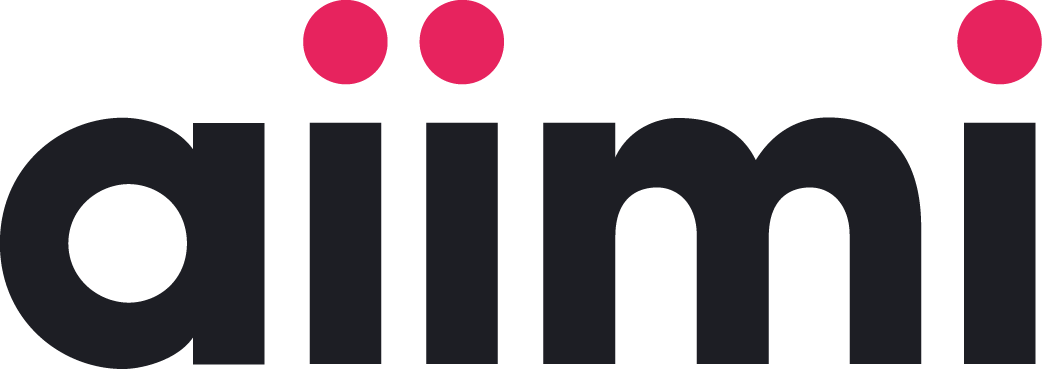

In [40]:

import base64
from IPython.display import display, Image as IPythonImage


# Decode the Base64 string to binary data
image_data = base64.b64decode(base64_image)

display(IPythonImage(data=image_data))


Magic!

# Recap

* What is an encoding?
* What different types of encoding are there?
* What are their relative merits?
* What is Hexadecimal and how is it relevant to encodings?
* What is Base 64 and when might we use it?

# Homework

Can you create a script which will take a text file and tell you what encoding was used?
